In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df = pd.read_csv("movies.csv")

In [6]:
#looking at data

df. head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [35]:
#Checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [27]:
# Data Types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [46]:
# Changing data types for columns

df['gross'] = df['gross'].fillna(0).astype('int64')
df['budget'] = df['budget'].fillna(0).astype('int64')

In [110]:
# Separating Month, Day, Country from Released column

#df['releasedcountry'] = df['released'].str.split().str[3:]

#df['releasedmonth'] = df['released'].str.split().str[:1]

#df['releasedday'] = df['released'].str.split().str[1:2]

df = df.drop(columns=['releasedcountry', 'releasedmonth', 'releasedday'])

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,223
7445,Avengers: Endgame,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,936
3045,Titanic,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,237
6663,Star Wars: Episode VII - The Force Awakens,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,227
7244,Avengers: Infinity War,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,928


In [86]:
# Sort by budget

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [48]:
pd.set_option('display.max_rows', None)

In [50]:
# Check for duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

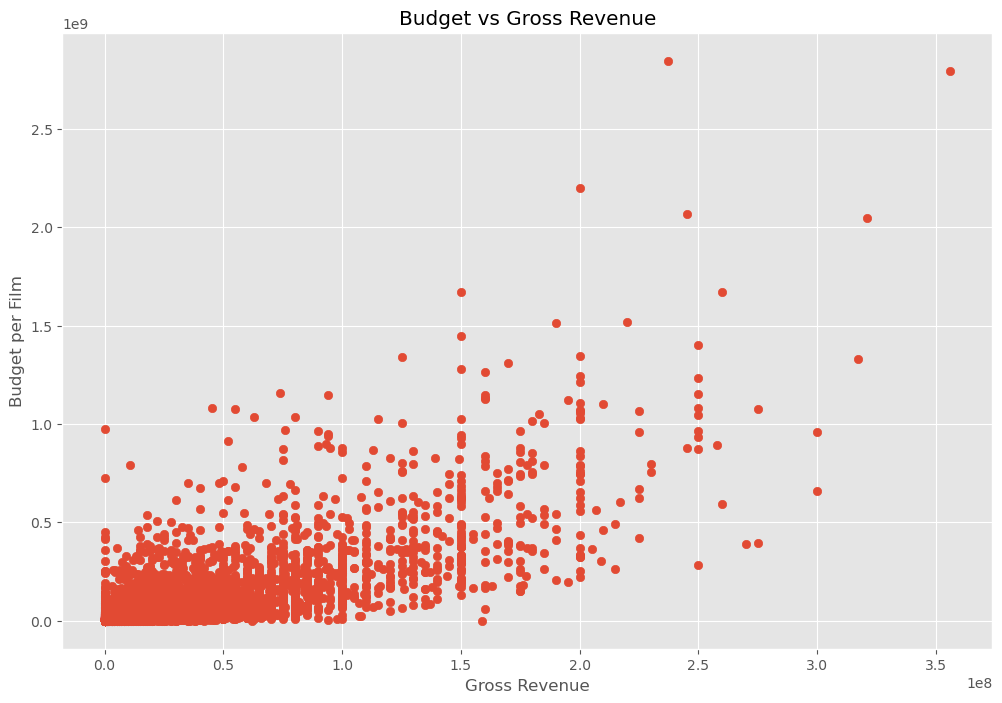

In [88]:
# Plotting

# Scatter plot with budget and gross revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Revenue')

plt.xlabel('Gross Revenue')
plt.ylabel('Budget per Film')

plt.show()




In [87]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,releasedcountry,releasedmonth,releasedday
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"18, 2009 (United States)","[(United, States)]",[December],"[18,]"
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,", 2019 (United States)","[(United, States)]",[April],"[26,]"
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"19, 1997 (United States)","[(United, States)]",[December],"[19,]"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"18, 2015 (United States)","[(United, States)]",[December],"[18,]"
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,", 2018 (United States)","[(United, States)]",[April],"[27,]"


<AxesSubplot:xlabel='budget', ylabel='gross'>

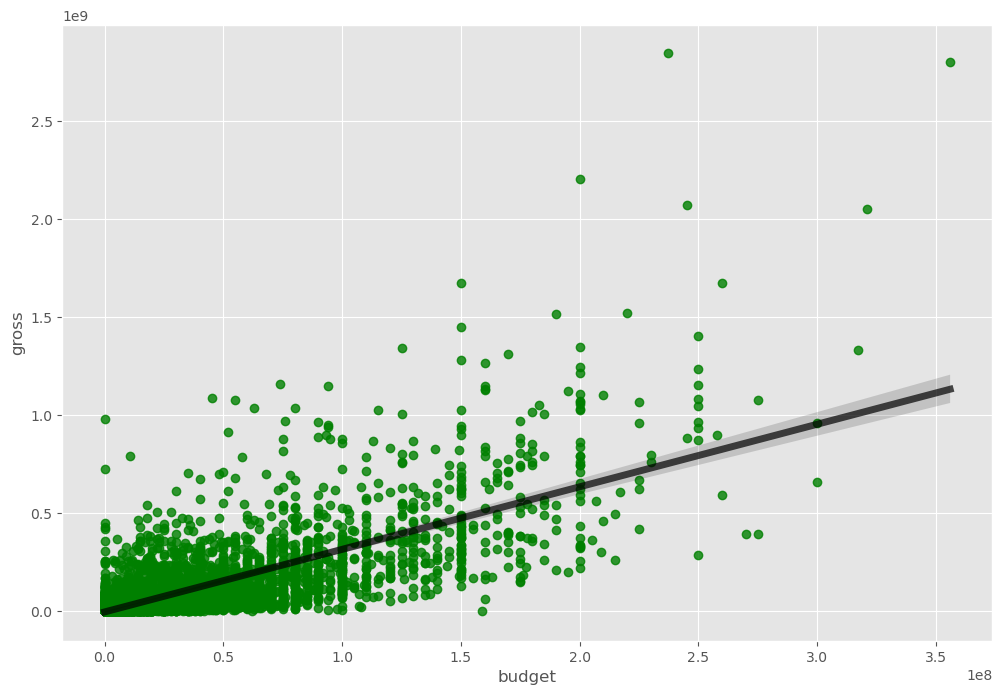

In [100]:
# Regression Plot

sns.regplot(x='budget', y='gross', data=df, line_kws={"color": "black", "alpha":0.7, "lw":5},
            scatter_kws={"color":"green"})

In [103]:
# Corrlations

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


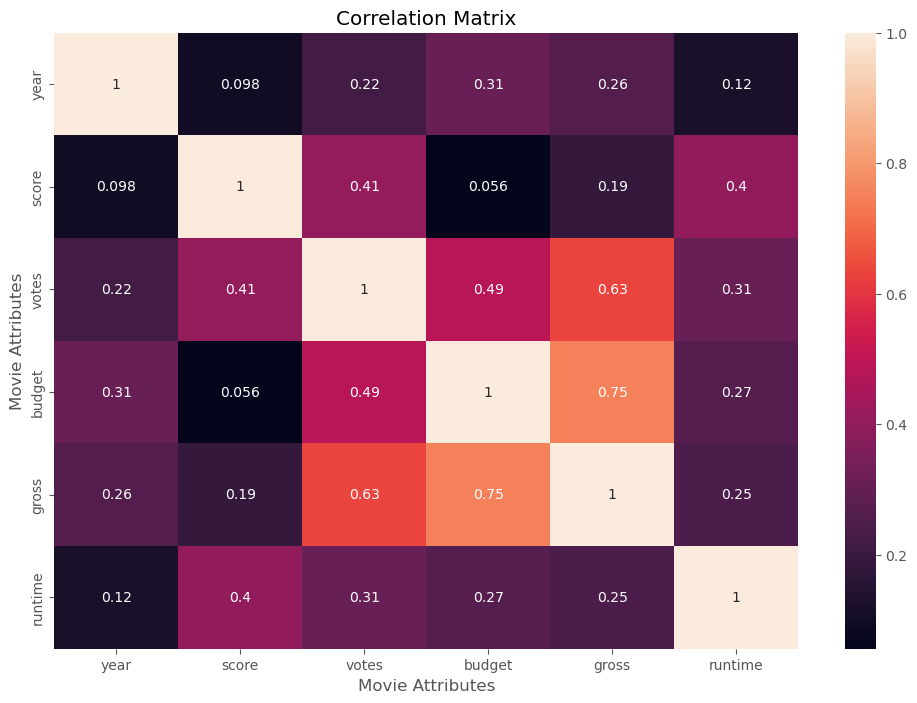

In [105]:
# High correlation between budget and gross

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')

plt.xlabel('Movie Attributes')
plt.ylabel('Movie Attributes')

plt.show()

In [128]:
# Company

df_numerized = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,0.344538,0.138367,0.253906,0.656262,0.107033,0.595709,0.720119,0.782929,0.653260,0.193910,0.111217,0.978147,0.686234,0.071772,0.556869
rating,0.344538,1.000000,-0.014784,0.036004,0.263736,-0.069097,0.154171,0.283992,0.303181,0.303931,0.199683,0.083569,0.351587,0.334664,0.033730,0.261554
genre,0.138367,-0.014784,1.000000,0.087977,0.090957,0.063222,0.148546,0.093457,0.088192,0.099710,-0.072434,0.101274,0.134001,0.057761,0.005585,0.048463
year,0.253906,0.036004,0.087977,1.000000,0.315368,0.076737,0.326475,0.173235,0.212396,0.228048,-0.055861,0.060244,0.266957,0.123375,0.032916,0.240228
released,0.656262,0.263736,0.090957,0.315368,1.000000,0.069418,0.449869,0.502084,0.546858,0.476483,0.163594,0.080321,0.669825,0.467309,0.046191,0.816221


In [112]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,223
7445,Avengers: Endgame,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,936
3045,Titanic,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,237
6663,Star Wars: Episode VII - The Force Awakens,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,227
7244,Avengers: Infinity War,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,928


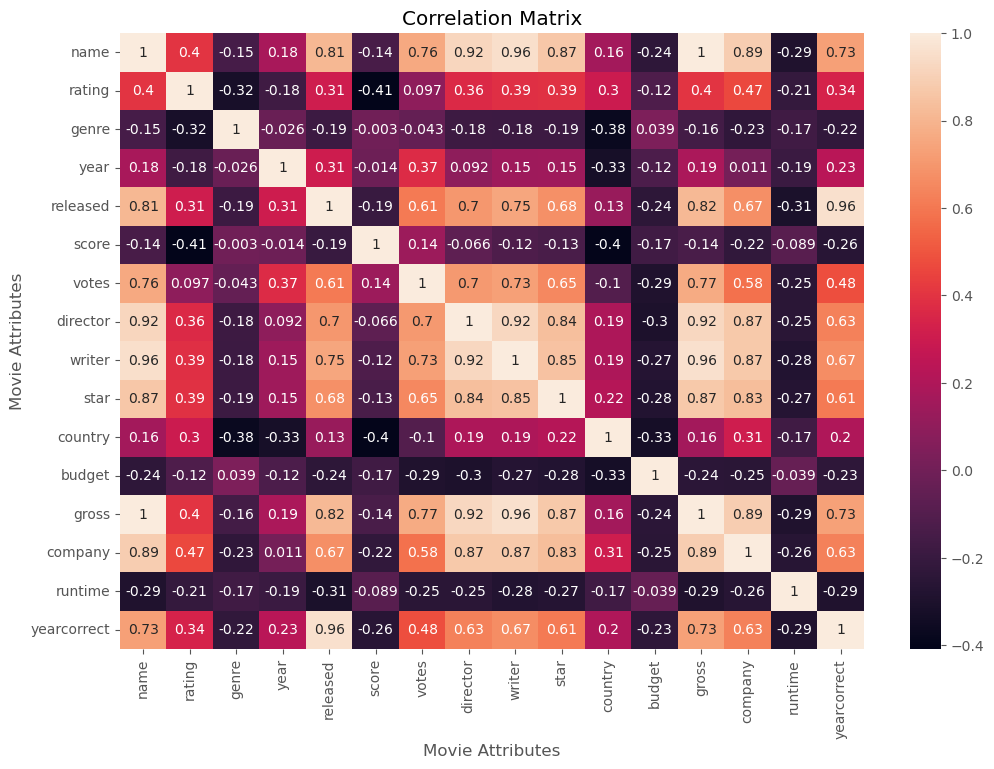

In [116]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')

plt.xlabel('Movie Attributes')
plt.ylabel('Movie Attributes')

plt.show()

In [118]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating         0.400374
             genre         -0.149844
             year           0.179229
             released       0.812053
             score         -0.140667
             votes          0.759351
             director       0.919722
             writer         0.955746
             star           0.867131
             country        0.160871
             budget        -0.236743
             gross          0.999438
             company        0.887431
             runtime       -0.290292
             yearcorrect    0.728111
rating       name           0.400374
             rating         1.000000
             genre         -0.318734
             year          -0.177037
             released       0.311855
             score         -0.408861
             votes          0.096682
             director       0.364695
             writer         0.388761
             star           0.392274
             country        0.296639
 

In [119]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

rating       score         -0.408861
score        rating        -0.408861
country      score         -0.399266
score        country       -0.399266
genre        country       -0.375683
country      genre         -0.375683
             budget        -0.327624
budget       country       -0.327624
country      year          -0.325100
year         country       -0.325100
rating       genre         -0.318734
genre        rating        -0.318734
released     runtime       -0.306359
runtime      released      -0.306359
director     budget        -0.299822
budget       director      -0.299822
gross        runtime       -0.292429
runtime      gross         -0.292429
votes        budget        -0.291866
budget       votes         -0.291866
yearcorrect  runtime       -0.291163
runtime      yearcorrect   -0.291163
             name          -0.290292
name         runtime       -0.290292
runtime      writer        -0.279809
writer       runtime       -0.279809
star         budget        -0.279378
b

In [120]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        company        0.577128
company      votes          0.577128
yearcorrect  star           0.605429
star         yearcorrect    0.605429
released     votes          0.607084
votes        released       0.607084
company      yearcorrect    0.626730
yearcorrect  company        0.626730
director     yearcorrect    0.627435
yearcorrect  director       0.627435
star         votes          0.652308
votes        star           0.652308
yearcorrect  writer         0.669546
writer       yearcorrect    0.669546
released     company        0.674161
company      released       0.674161
released     star           0.676336
star         released       0.676336
released     director       0.702794
director     released       0.702794
             votes          0.704553
votes        director       0.704553
             writer         0.727137
writer       votes          0.727137
name         yearcorrect    0.728111
yearcorrect  name           0.728111
             gross          0.731704
g

In [122]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,223
7445,Avengers: Endgame,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,936
3045,Titanic,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,237
6663,Star Wars: Episode VII - The Force Awakens,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,227
7244,Avengers: Infinity War,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,928


In [126]:
# Looking at the top 15 movies by gross revenue

CompanyGrossSum = df.groupby('name')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted


name
Avatar                                          2847246203
Avengers: Endgame                               2797501328
The Lion King                                   2754448457
Titanic                                         2201647264
Star Wars: Episode VII - The Force Awakens      2069521700
Avengers: Infinity War                          2048359754
Beauty and the Beast                            1689402145
Jurassic World                                  1670516444
Aladdin                                         1554744172
The Avengers                                    1542200454
Furious 7                                       1515341399
Frozen II                                       1450026933
Avengers: Age of Ultron                         1402809540
Black Panther                                   1347597973
Harry Potter and the Deathly Hallows: Part 2    1342321665
Name: gross, dtype: int64

In [ ]:
# Many correlations - the highes being name of movie to gross revenue, writer, director, and star.

# Votes had very low correlations